In [139]:
### Importing necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.gridspec import GridSpec
import plotly.express as px
import scipy.stats as stats
import os

In [71]:
### Importing dataset and Reading the data
data = pd.read_csv('OnlineRetail.csv', header= 0, encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [89]:
#filtering out the data set for UK only
data_Non_Uk = data[data['Country'] == 'United Kingdom'].reset_index(drop = True)
data.shape

(354345, 9)

In [73]:
#checking for null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [74]:
#Dropping the rows where customerID is missing
data = data[pd.notnull(data['CustomerID'])]
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [75]:
### filtering data for positive quantity values 
data = data.query("Quantity > 0")
data.shape

(354345, 8)

In [76]:
#Adding new columns as total amount
data['Total_Amount'] = data['UnitPrice']*data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [77]:
### Creating Revenue contributed subset 
revenue_con = data.groupby('CustomerID')['Total_Amount'].sum()
revenue_con = revenue_con.reset_index()
revenue_con.head()

,CustomerID,Total_Amount
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [78]:
### Creating subset frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59


In [79]:
### convert the InvoiceDate as date variable
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [81]:
### calculation of Recency 
Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','Total_Amount' : 'sum'}).reset_index()
RFM_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Total_Amount
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [82]:
### Changing column names
RFM_data.rename(columns = {'InvoiceDate':'Recency','InvoiceNo',"Frequency",'Total_Amount':"Monetary"},inplace = True)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [100]:
# RFM_data Description/ Summary
RFM_data.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



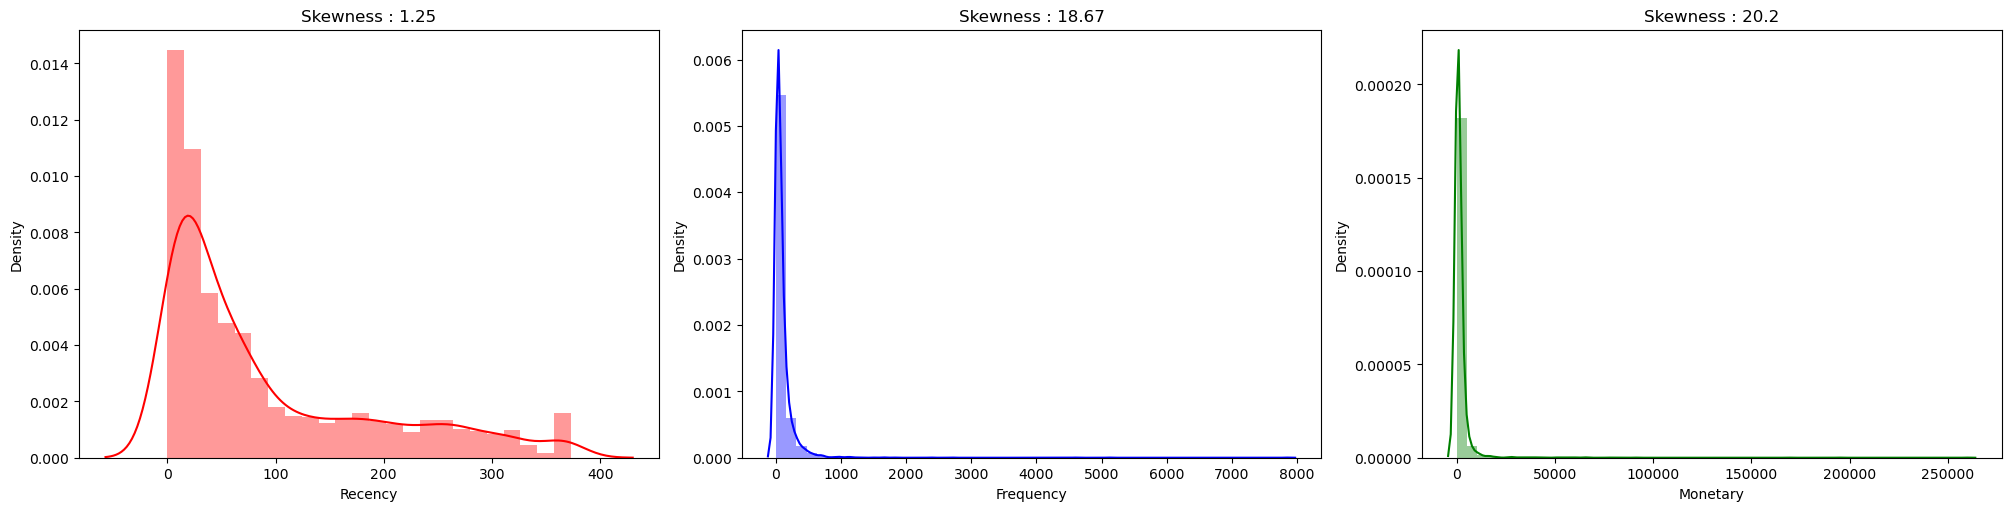

In [98]:
#Visualizing the Recency, Frequency and Monetary distributions.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1

In [122]:
### Segmentation :
### we will divide the data set into 4 parts based on the quantiles.
quantiles = RFM_data.drop('CustomerID',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 145.0},
 'Frequency': {0.25: 16.0, 0.5: 40.0, 0.75: 96.0},
 'Monetary': {0.25: 294.7, 0.5: 631.57, 0.75: 1488.06},
 'R_score': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'F_score': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'M_score': {0.25: 1.5, 0.5: 3.0, 0.75: 3.5},
 'RFM_Score': {0.25: 5.0, 0.5: 8.0, 0.75: 10.0}}

In [127]:
### [1] Recency segmentation(Negative Impact : Higher the value, less valuable)
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
### [2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

In [126]:
### Segmentation:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
1,12747.0,2,103,4196.01,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5
5,12821.0,214,6,92.72,4,4,4,444,12
6,12822.0,70,46,948.88,3,2,2,322,7


In [124]:
### Creating : RFMGroup and RFMScore
RFM_data['RFM_Group']=RFM_data['R_score'].astype(str)+RFM_data['F_score'].astype(str)+RFM_data['M_score'].astype(str)

RFM_data['RFM_Score'] = RFM_data[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
1,12747.0,2,103,4196.01,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5
5,12821.0,214,6,92.72,4,4,4,444,12
6,12822.0,70,46,948.88,3,2,2,322,7


In [128]:
#Creating the Customer Loyality_level
loyalty_level = ['Bronze','Silver','Gold','Platinum']
cuts = pd.qcut(RFM_data['RFM_Score'],q = 4,labels=loyalty_level)
RFM_data['RFM_Loyality_level'] = cuts.values
RFM_data.tail(15)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
3905,18263.0,25,61,1213.16,2,2,2,222,6,Silver
3906,18265.0,72,46,801.51,3,2,2,322,7,Silver
3907,18268.0,134,1,25.50,3,4,4,344,11,Platinum
3908,18269.0,366,7,168.60,4,4,4,444,12,Platinum
3909,18270.0,38,11,283.15,2,4,4,244,10,Gold
3910,18272.0,2,166,3078.58,1,1,1,111,3,Bronze
3911,18273.0,2,3,204.00,1,4,4,144,9,Gold
3912,18274.0,30,11,175.92,2,4,4,244,10,Gold
3913,18276.0,43,14,335.86,2,4,3,243,9,Gold
3914,18277.0,58,8,110.38,3,4,4,344,11,Platinum


In [129]:
### Visulaizing Recency V/s Frequency : RFM_Loyality_level
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

In [130]:
### Visulaizing Frequency V/s Monetary : RFM_Loyality_level
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

In [131]:
### Visulaizing Monetary V/s Recency : RFM_Loyality_level
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()

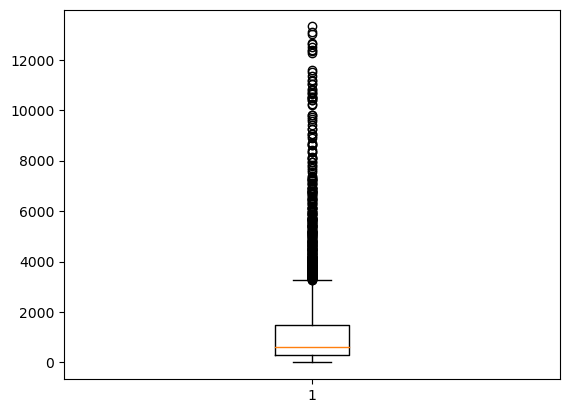

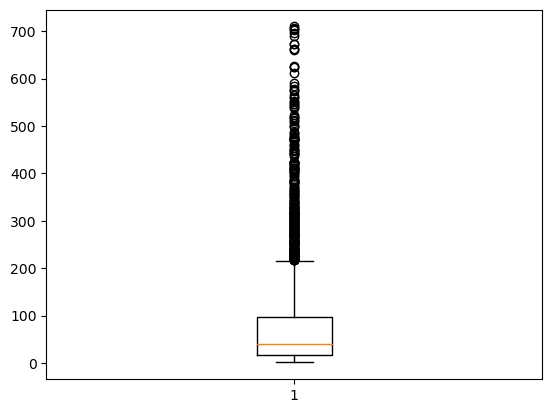

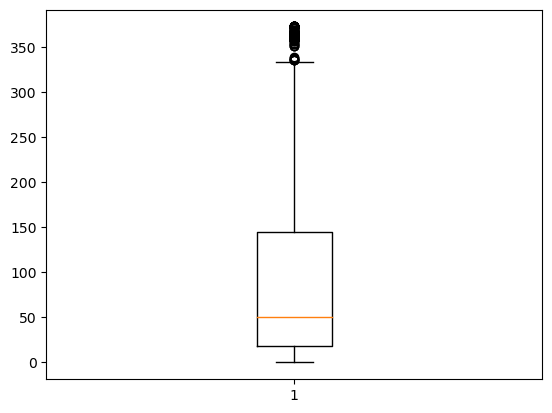

In [132]:
### Outlier Treatment 
plt.boxplot(RFM_data['Monetary'])
plt.show()
plt.boxplot(RFM_data['Frequency'])
plt.show()
plt.boxplot(RFM_data['Recency'])
plt.show()

In [106]:
Q1_Monetary = RFM_data['Monetary'].quantile(0.05)
Q3_Monetary = RFM_data['Monetary'].quantile(0.95)
IQR = Q3_Monetary - Q1_Monetary 
RFM_data= RFM_data[(RFM_data['Monetary'] >= Q1_Monetary- 1.5*IQR)&(RFM_data['Monetary'] <= Q3_Monetary +1.5*IQR)]


Q1_Freq = RFM_data['Frequency'].quantile(0.05)
Q3_Freq = RFM_data['Frequency'].quantile(0.95)
IQR = Q3_Freq - Q1_Freq
RFM_data= RFM_data[(RFM_data['Frequency'] >= Q1_Freq- 1.5*IQR)&(RFM_data['Frequency'] <= Q3_Freq +1.5*IQR)]


Q1_Recency = RFM_data['Recency'].quantile(0.05)
Q3_Recency = RFM_data['Recency'].quantile(0.95)
IQR = Q3_Recency - Q1_Recency
RFM_data= RFM_data[(RFM_data['Recency'] >= Q1_Recency- 1.5*IQR)&(RFM_data['Recency'] <= Q3_Recency +1.5*IQR)]

In [133]:
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000
mean,15563.940993,93.168963,76.194697,1245.173947,2.492592,2.510788,2.500130,7.503509
std,1575.990674,99.691234,99.288492,1689.155748,1.123606,1.119406,1.118296,2.794286
min,12747.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,14210.500000,18.000000,16.000000,294.700000,1.000000,2.000000,1.500000,5.000000
50%,15572.000000,51.000000,40.000000,631.570000,2.000000,3.000000,3.000000,8.000000
75%,16914.500000,145.000000,96.000000,1488.060000,3.000000,4.000000,3.500000,10.000000
max,18287.000000,373.000000,710.000000,13316.400000,4.000000,4.000000,4.000000,12.000000


In [134]:
RFM_data['Recency'] = RFM_data['Recency'].apply(lambda x : right_treat(x))
RFM_data['Monetary'] = RFM_data['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data['Monetary'].skew().astype(str))

Recency Skewness : 1.2271255729306652
Frequency Skewness : 2.7317941571536823
Monetary Skewness : 3.150173087362587


In [137]:
#Log Transformation
Log_RFM_data = RFM_data[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



,Recency,Frequency,Monetary
count,3847.000000,3847.000000,3847.000000
mean,3.777064,3.617925,6.476062
std,1.442702,1.296888,1.161980
min,0.000000,0.000000,0.000000
25%,2.890400,2.772600,5.685950
50%,3.931800,3.688900,6.448200
75%,4.976700,4.564300,7.305250
max,5.921600,6.565300,9.496800


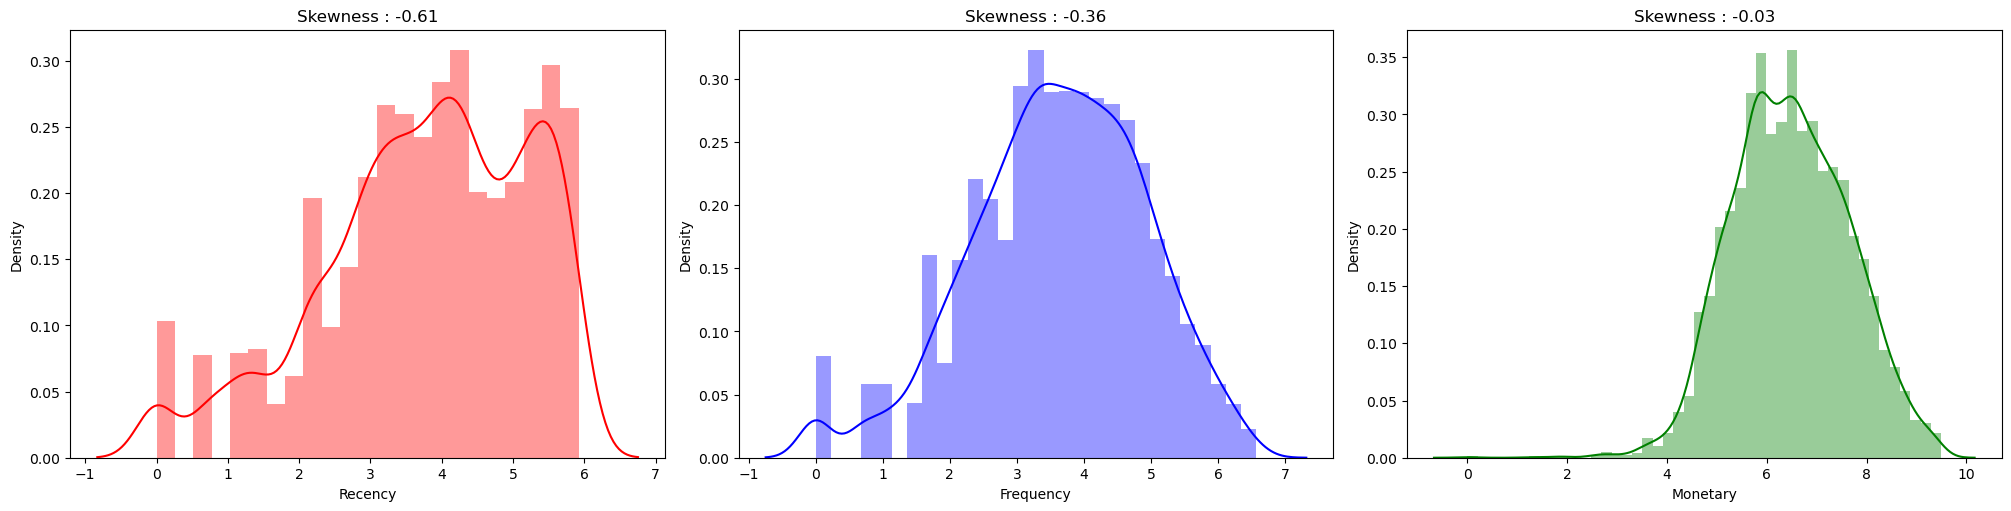

In [138]:
#Plotting:
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(Log_RFM_data.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(Log_RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(Log_RFM_data[var].skew(),2).astype(str))
    i= i+1
Log_RFM_data.describe()

In [142]:
#Scaling 
RFM_Scaler = StandardScaler()
RFM_data_Scaled = RFM_Scaler.fit_transform(Log_RFM_data)
RFM_data_Scaled = pd.DataFrame(RFM_data_Scaled,columns=Log_RFM_data.columns,index=Log_RFM_data.index)

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

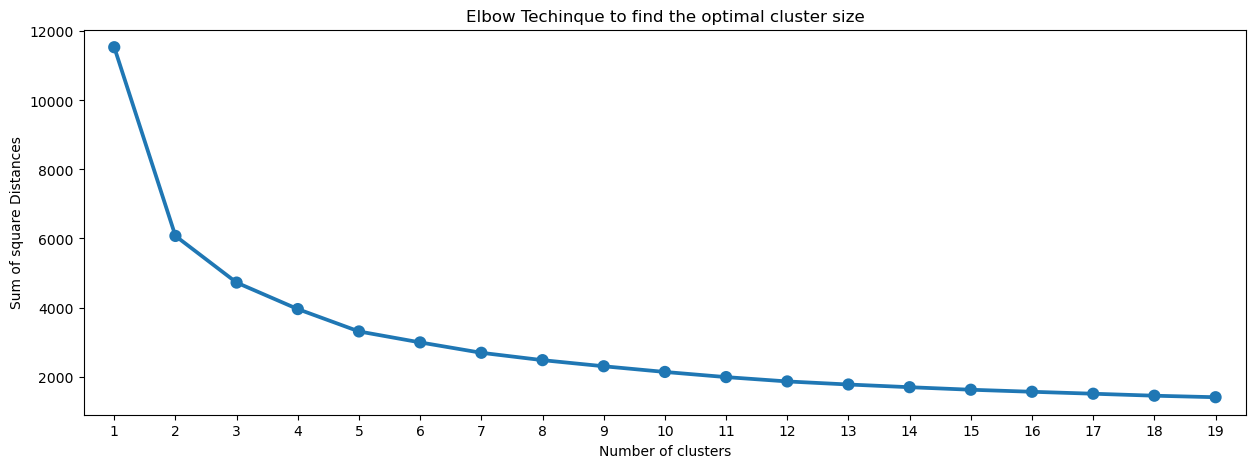

In [144]:
### wss
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(RFM_data_Scaled)
    SS_distance[k] = mod.inertia_


plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque")

In [146]:
### Clustering
KM_cluster = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
KM_cluster.fit(RFM_data_Scaled)

KMeans(max_iter=1000, n_clusters=3)

In [148]:
### Assigning Cluster labels
RFM_data['Cluster'] = KM_cluster.labels_
RFM_data['Cluster'] = 'Cluster' + RFM_data['Cluster'].astype(str)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
1,12747.0,2,103,4196.01,1,1,1,111,3,Bronze,Cluster1
3,12749.0,3,199,4090.88,1,1,1,111,3,Bronze,Cluster1
4,12820.0,3,59,942.34,1,2,2,122,5,Bronze,Cluster1
5,12821.0,214,6,92.72,4,4,4,444,12,Platinum,Cluster2
6,12822.0,70,46,948.88,3,2,2,322,7,Silver,Cluster0


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

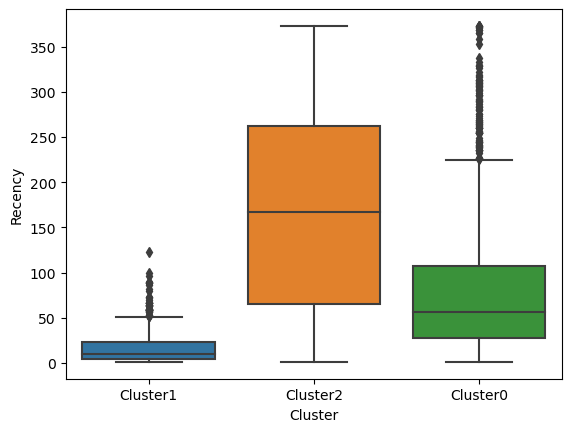

In [150]:
#plots 
sns.boxplot(x='Cluster', y='Recency', data = RFM_data)

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

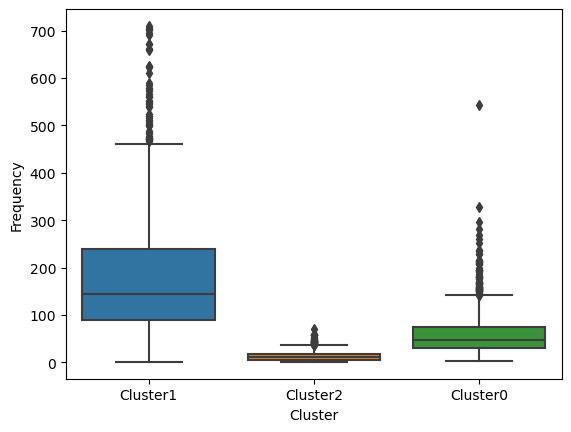

In [151]:
### plots 
sns.boxplot(x='Cluster', y='Frequency', data = RFM_data)

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

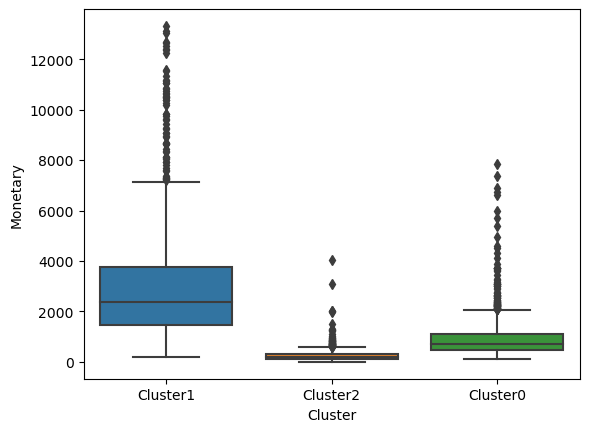

In [152]:
### plots 
sns.boxplot(x='Cluster', y='Monetary', data = RFM_data)

In [153]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = 'Recency',y = 'Frequency', color = 'Cluster')
fig.show()

In [154]:
# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Frequency', color = 'Cluster')
fig.show()

In [155]:
# Recency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Recency', color = 'Cluster')
fig.show()